In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import the Data 

In [23]:
## Reading the files, in the most complicated way, but allows me to do them all at once.
dfs = {}
csvs = [x for x in os.listdir('./titanic') if x.endswith('.csv')]#list all the files and directories in the given directories
csvs
for filename in csvs:
    dfs[filename] = pd.read_csv(f'./titanic/{filename}')

print(dfs.keys())
test_data = dfs.get('test.csv')
train_data= dfs.get('train.csv')
gender_data = dfs.get('gender_submission.csv')

dict_keys(['test.csv', 'train.csv', 'gender_submission.csv'])


# EDA: Cleaning, Imputing, and  Visualization

In [24]:
pd.set_option('display.max_rows', None)
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [25]:
##getiing some info of the null for the train data
print(train_data.info())
train_data_null = train_data.isnull().sum()
print(train_data_null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

In [26]:
#imputing the missing data
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy= 'mean') # for numerical 
mode_imputer = SimpleImputer(strategy = "most_frequent") #For catagorical 
train_data['Age'] = mean_imputer.fit_transform(train_data['Age'].values.reshape(-1, 1)).flatten() 
# imputer expect a 2d array format, hence the reshape and flatten to return into 1d
train_data['Embarked'] = mode_imputer.fit_transform(train_data['Embarked'].values.reshape(-1,1)).flatten()
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [27]:
test_data.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [28]:
##getiing some info of the null for the test data
print(test_data.info())
test_data_null = test_data.isnull().sum()
print(test_data_null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [29]:
columns = ['Age', "Fare"]
test_data['Age'] = mean_imputer.fit_transform(test_data['Age'].values.reshape(-1,1)).flatten()
test_data['Fare'] = mean_imputer.fit_transform(test_data['Fare'].values.reshape(-1,1)).flatten()
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
# Droping the cabin column since there is to many missing values to dervive anything from it.
test_data = test_data.drop(columns = 'Cabin')
train_data = train_data.drop(columns = 'Cabin')

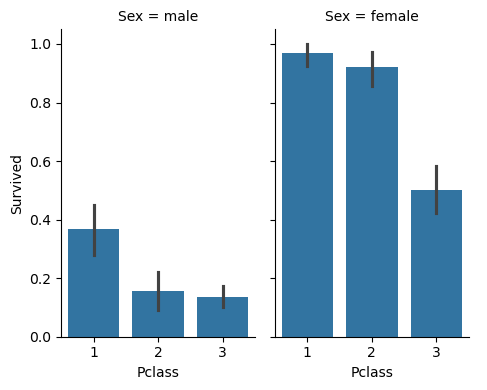

In [31]:
import seaborn as sns
sns.catplot(
    data= train_data, x="Pclass", y="Survived", col="Sex",
    kind="bar", height=4, aspect=.6,
    )

<Axes: xlabel='Sex', ylabel='Survived'>

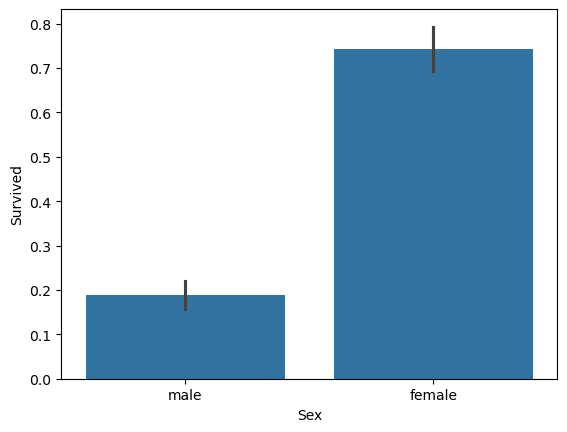

In [32]:
sns.barplot(x = train_data['Sex'], y = train_data['Survived'])


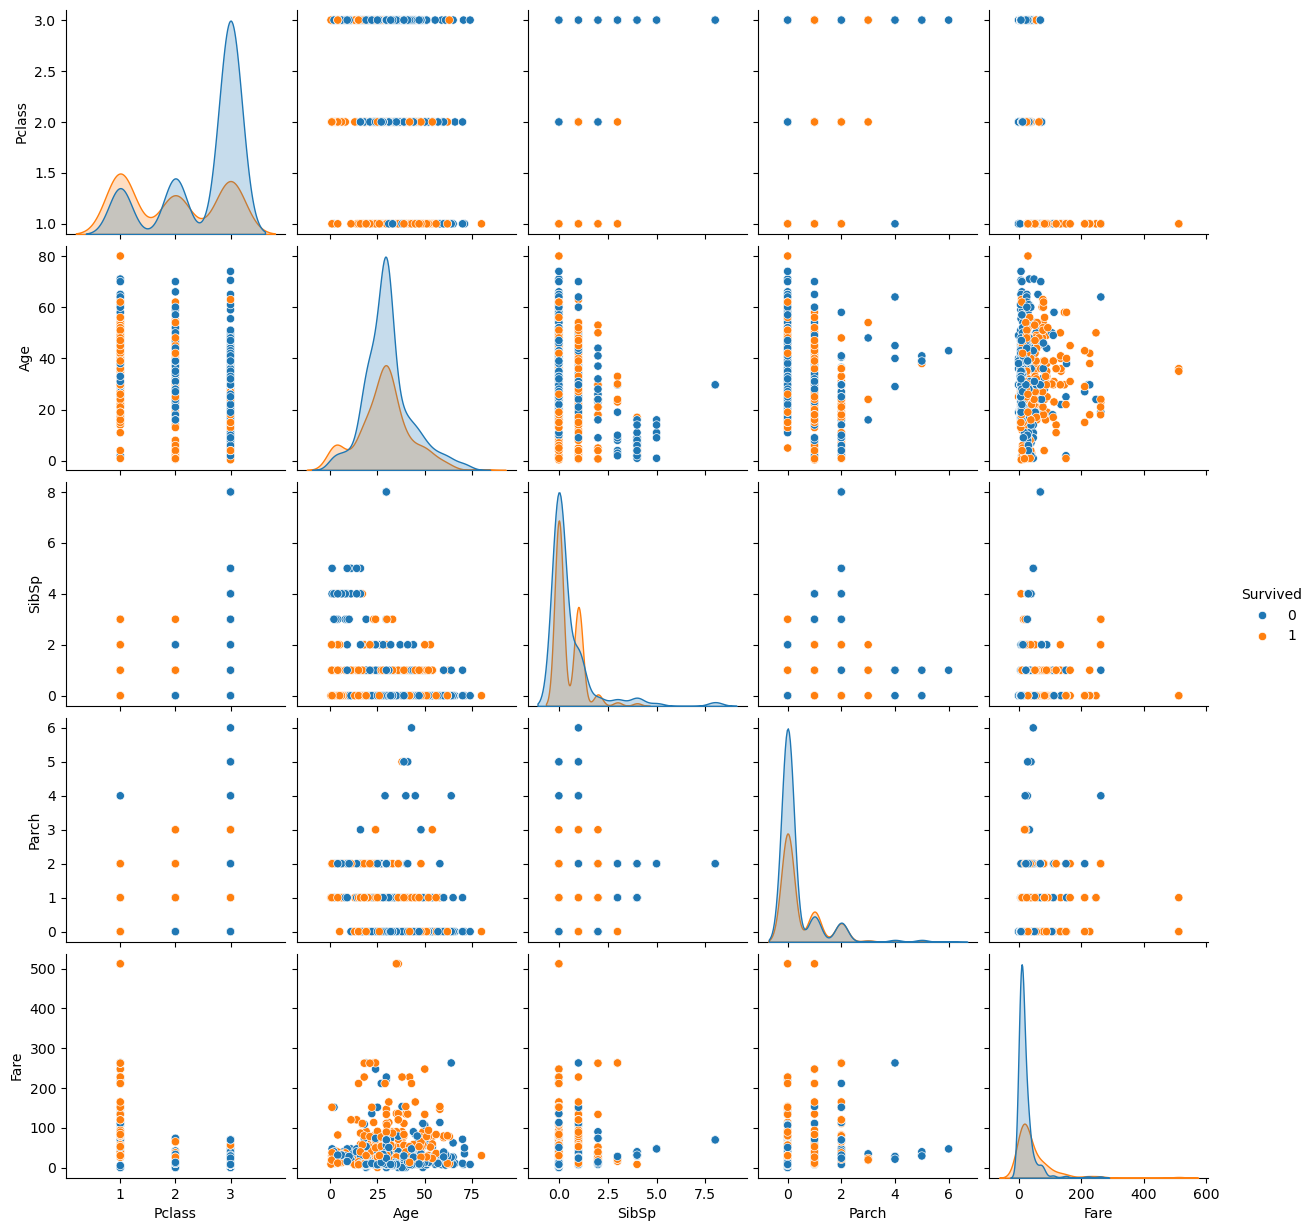

In [33]:
sns.pairplot(train_data.drop(columns = 'PassengerId').select_dtypes(['number']), hue = "Survived")
plt.show()

<Axes: >

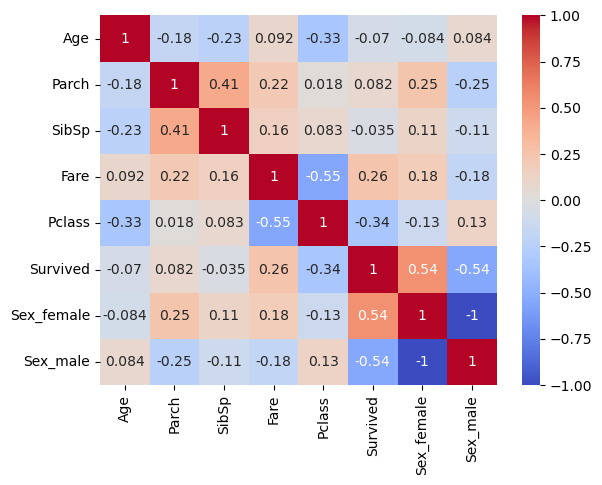

In [34]:
columns = ['Name', 'PassengerId']
numerical = ['Age','Parch','SibSp','Fare','Pclass','Survived',"Sex"]
corr_matrix = pd.get_dummies(train_data[numerical])
corr_matrix = corr_matrix.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#corr_matrix

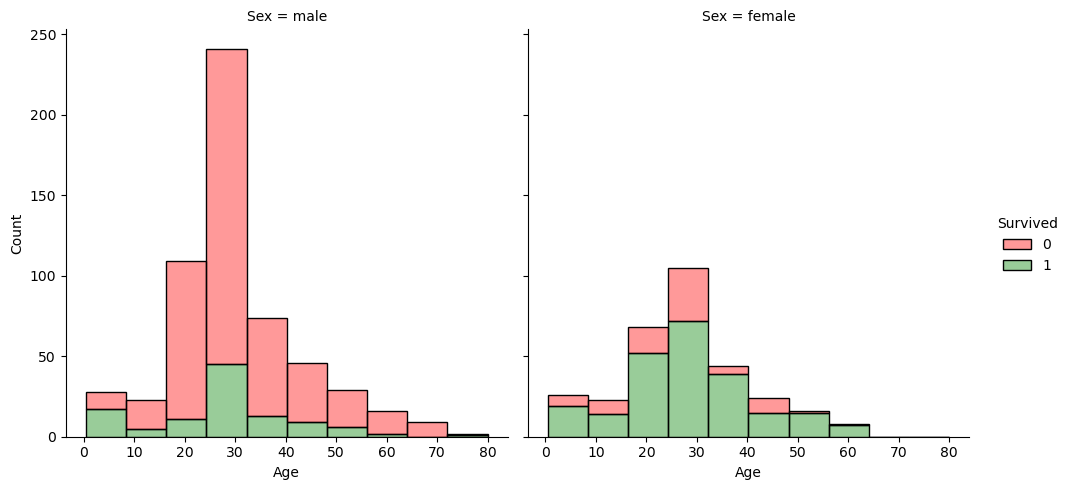

In [35]:
palette = {0:'Red',
           1:'green'}
sns.displot(data=train_data, x='Age', hue='Survived',palette= palette, col = 'Sex', bins = 10, alpha = .4 ,multiple = 'stack')
plt.show()
 

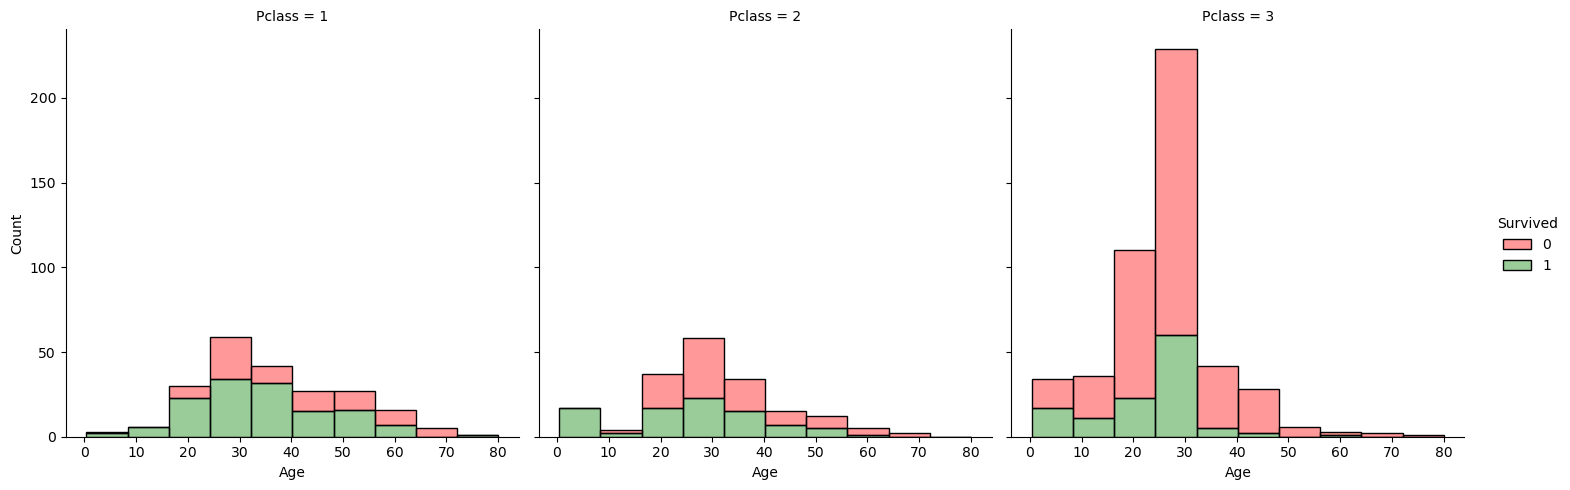

In [36]:
palette = {0:'Red',
           1:'green'}
sns.displot(data=train_data, x='Age', hue='Survived',palette= palette, col = 'Pclass', bins = 10, alpha = .4 ,multiple = 'stack')
plt.show()

In [37]:
#This is a good graphical representation of the passenger Class effect on the survival

In [38]:
# Making the Sib and Parch more useful features 
# Since they are Siblings and parent/child respectivlely, it makes more sense to combine them into one column 
data = [train_data, test_data] #aggergating both at once 
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'Traveled Alone'] = False
    dataset.loc[dataset['relatives'] == 0, 'Traveled Alone'] = True
print(train_data.head())
print("________________________")
print(test_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  relatives Traveled Alone  
0      0         A/5 21171   7.2500        S          1          False  
1      0          PC 17599  71.2833        C          1          False  
2      0  STON/O2. 3101282   7.9250        S          0           True  
3      0            113803  

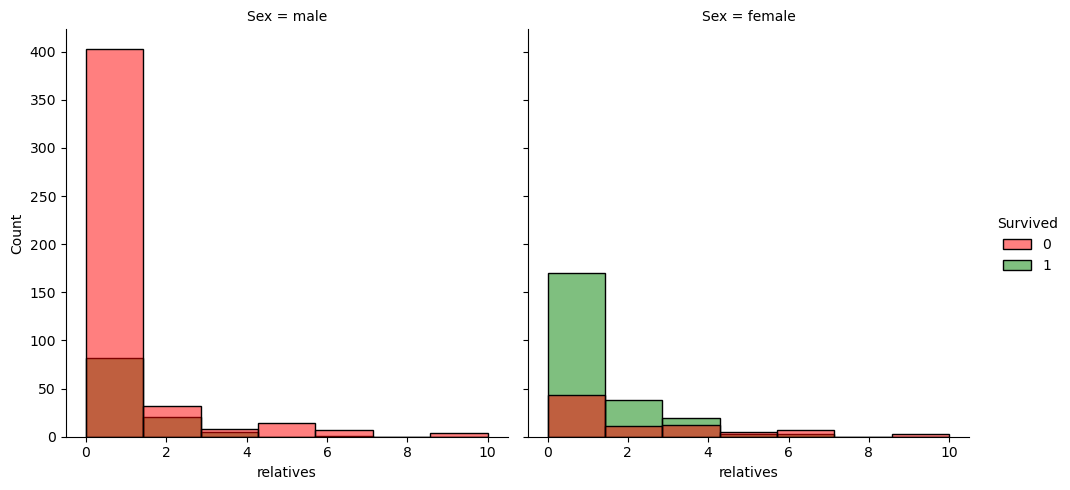

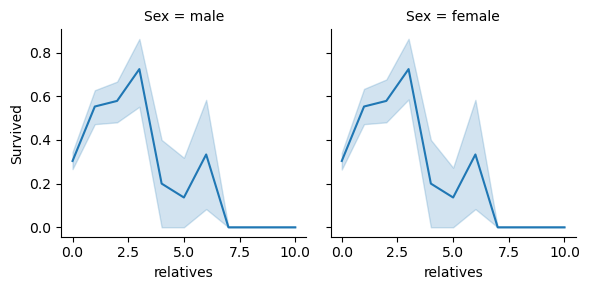

In [39]:
#Visualizing the new column
sns.displot(train_data, x = "relatives", col = 'Sex', bins = 7, hue = 'Survived', palette=palette)
plt.show()
grid = sns.FacetGrid(train_data, col="Sex", margin_titles=True)
grid.map(sns.lineplot,data = train_data,x = 'relatives',y = 'Survived')


In [40]:
print('Number of Women:',len(train_data.loc[train_data['Sex']=='female']))
print('Number of Men:',len(train_data.loc[train_data['Sex']=='male']))
#based off the grid the number of people who had 0-2 relatives had a higher prob of living
# 

Number of Women: 314
Number of Men: 577


In [41]:
# Creating Age Groups
age_groups = {range(0,13):'Child',
              range(13,20):'Teenager',
              range(20,30):'Young Adult',
              range(30,60):"Adult",
              range(60,80):"Senior"}
ages = [13,18,25,40,66] ## checking the logic
for age in ages:
    for key, value in age_groups.items():
         if age in key:
                print(f"Age {age}:{value}")
                break
#Creating a function to apply the Age group to the DF
def age_grouper(age):
     for key, value in age_groups.items():
        if age in key:
            return value
#applying to both datasets
for dataset in data:
    dataset['Age Group'] = dataset['Age'].astype(int).map(lambda x: age_grouper(x))
#Checking 
print(train_data.head())
print("______________________")
print(test_data.head())

Age 13:Teenager
Age 18:Teenager
Age 25:Young Adult
Age 40:Adult
Age 66:Senior
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  relatives Traveled Alone  \
0      0         A/5 21171   7.2500        S          1          False   
1      0          PC 17599  71.2833        C          1          False   
2      0  STON/O2. 3

/var/folders/nn/9kz8gxh905dddp63xswjzyn40000gn/T/ipykernel_17546/1476691846.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train_data,x= "Age Group", y= 'Survived',palette= "rocket")


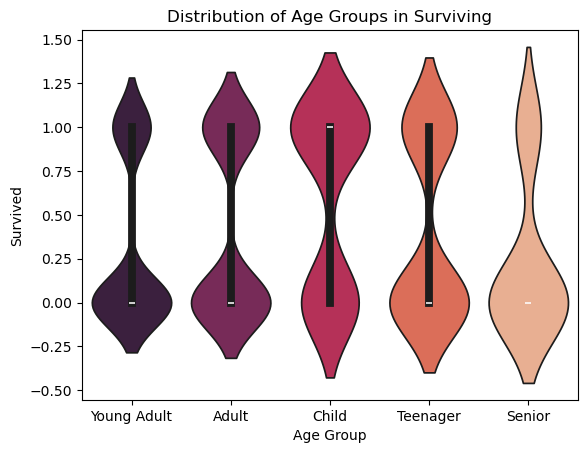

In [42]:
#Visualizing the new catagory 
sns.violinplot(train_data,x= "Age Group", y= 'Survived',palette= "rocket")
plt.title("Distribution of Age Groups in Surviving")
plt.show()

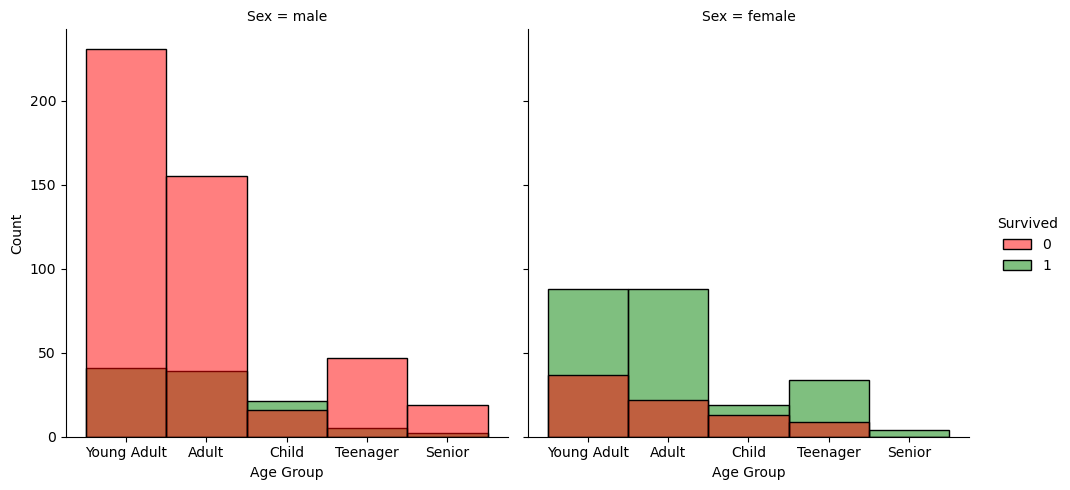

In [43]:
sns.displot(data = train_data,x= "Age Group",palette= palette, hue ='Survived', col = "Sex")
plt.show()

In [44]:
#Child in both group have more survivors

In [45]:

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,Traveled Alone,Age Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,False,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,False,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,True,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,False,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,True,Adult


In [46]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,Traveled Alone,Age Group
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,True,Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,False,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,True,Senior
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,True,Young Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,2,False,Young Adult


In [47]:
for dataset in data:
    dataset['Title'] = dataset['Name'].astype(str).map(lambda x: x.split(',')[1].split(". ")[0])
train_data.head(1)
print(train_data['Title'].unique())
titles = train_data.drop_duplicates(subset='Title')
titles

[' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,Traveled Alone,Age Group,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,False,Young Adult,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,False,Adult,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,True,Young Adult,Miss
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,4,False,Child,Master
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,C,0,True,Adult,Don
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,S,0,True,Adult,Rev
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,Q,2,False,Adult,Dr
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,C,0,True,Young Adult,Mme
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,S,0,True,Young Adult,Ms
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,S,0,True,Adult,Major


In [48]:
print(train_data["Title"].value_counts())
print("______________")
print(test_data["Title"].value_counts())

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64
______________
Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


In [49]:
# Testing the features to be used in the model
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
testing_features = ['Pclass','Sex',"Title","SibSp","Parch","relatives","Embarked",'Traveled Alone','Age Group',"Fare"]
X = pd.get_dummies(train_data[testing_features])
Y = train_data['Survived']
#Chi Squared
chi_scores = chi2(X,Y)
Chi2_df = pd.DataFrame({
    "Features":X.columns,
    "Chi Squr": chi_scores[0],
    "P-value": chi_scores[1]})
Chi2_df = Chi2_df.sort_values(by = 'P-value')
Chi2_df

,Features,Chi Squr,P-value
4,Fare,4518.319091,0.000000e+00
5,Sex_female,170.348127,6.210585e-39
18,Title_ Mr,112.805785,2.379805e-26
6,Sex_male,92.702447,6.077838e-22
19,Title_ Mrs,88.050392,6.380801e-21
15,Title_ Miss,75.855581,3.051887e-18
0,Pclass,30.873699,2.753786e-08
27,Traveled Alone_False,22.209338,2.444818e-06
24,Embarked_C,20.464401,6.075071e-06
28,Traveled Alone_True,14.640793,1.300685e-04


In [50]:
other_titles = [' Mlle',' Lady',' Sir',' Capt',' the Countess',' Jonkheer',' Dona',' Don',' Major'," Mme"]
def replace_title(title):
    if title in other_titles:
        return "other"
    return title
 
for dataset in data:
    dataset['Title'] = dataset['Title'].apply(replace_title)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,Traveled Alone,Age Group,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,False,Young Adult,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,False,Adult,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,True,Young Adult,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,False,Adult,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,True,Adult,Mr


In [51]:
print(train_data["Title"].value_counts())
print("______________")
print(test_data["Title"].value_counts())

Title
 Mr        517
 Miss      182
 Mrs       125
 Master     40
other       11
 Dr          7
 Rev         6
 Col         2
 Ms          1
Name: count, dtype: int64
______________
Title
 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Ms          1
 Dr          1
other        1
Name: count, dtype: int64


In [54]:
# scaling and converting to array
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ['Pclass','Sex',"Title","Parch","relatives","Embarked",'Traveled Alone','Age Group',"Age"]
X = pd.get_dummies(train_data[features])
X = scaler.fit_transform(X)
print(X.shape)
Y = Y.to_numpy()
print(Y.shape)

(891, 25)
(891,)


# Model Selection

In [56]:
#Based on the chi distrubtion, all the features will be used except for the "Fare" variable
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.2, random_state = 42) #Splits the Data for training and testing

### Random Forest Model

In [75]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

In [76]:
# Grid search parameter testing 
from sklearn.model_selection import GridSearchCV

#Dictionary of hyperparameter to be tested
search_space = {
    'n_estimators' : [100,200,500],
    'max_depth':[3,6,9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
GS = GridSearchCV(estimator= rf_model,
                  param_grid=search_space ,#parameters to check
                  scoring= ['r2','neg_root_mean_squared_error'], #variance checking formulas
                  refit= 'neg_root_mean_squared_error',# Judging criteria for best fit
                  cv = 5, # number of cross validation folds
                  verbose = 4, # number of printed info
                  n_jobs= -1
                  )
GS.fit(X_train,Y_train)

In [242]:
# testing the accuracy for Random Forest
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(max_depth=6, min_samples_split=10, random_state=42)
model.fit(X_train,Y_train) #Fitting the model on the train data split set
Y_pred = model.predict(X_test)
accuracy_rf = accuracy_score(Y_test,Y_pred)
print(f' RF Accuracy is {accuracy_rf}')

 RF Accuracy is 0.8156424581005587


 ### Gradient Boosted Model

In [265]:
#Gradient Boosted
from sklearn.ensemble import GradientBoostingClassifier 
# Establishing the testing parameters 
GBC_model = GradientBoostingClassifier(random_state=42)
search_space2 = {
    'n_estimators': [100,200,300],
    'learning_rate': [.05,.06,.07],
    'max_depth': [3,4,5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [4,5,6],
    'loss':["log_loss",'exponential']
        }
GS2 = GridSearchCV(estimator= GBC_model,
                  param_grid= search_space2 ,#parameters to check
                  scoring=['r2'], #variance checking formulas
                  refit= 'r2', # Judging criteria for best fit
                  cv = 5, # number of cross validation folds
                  verbose = 4, # number of printed info
                  n_jobs=-1) # using all cores available
GS2.fit(X_train,Y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[CV 1/5] END learning_rate=0.05, loss=log_loss, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; r2: (test=0.256) total time=   0.5s
[CV 4/5] END learning_rate=0.05, loss=log_loss, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; r2: (test=0.157) total time=   0.5s
[CV 3/5] END learning_rate=0.05, loss=log_loss, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; r2: (test=0.157) total time=   0.5s
[CV 5/5] END learning_rate=0.05, loss=log_loss, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; r2: (test=0.193) total time=   0.5s
[CV 2/5] END learning_rate=0.05, loss=log_loss, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; r2: (test=0.405) total time=   0.5s
[CV 1/5] END learning_rate=0.05, loss=log_loss, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200; r2: (test=0.256) total time=   1.2s
[CV 3/5] END learning_rate=0.05, loss=log_loss, max_depth=3, min

In [254]:
print(GS2.best_params_)

{'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [251]:
model2 = GradientBoostingClassifier(learning_rate=0.05, max_depth=5, min_samples_leaf=5, #model is most accurate with 84%
                           n_estimators=200, random_state=42)
model2.fit(X_train,Y_train) #Fitting the model on the train data set
Y_pred2 = model2.predict(X_test)
accuracy_gbc = accuracy_score(Y_test,Y_pred2)
print(f' GBC Accuracy is {accuracy_gbc}')

 GBC Accuracy is 0.8435754189944135


In [ ]:
GradientBoostingClassifier(learning_rate=0.05, max_depth=5, min_samples_leaf=5, #model is most accurate with 84%
                           n_estimators=200, random_state=42)

In [229]:
model2.fit(X,Y) # refit on full data
X_test_data = pd.get_dummies(test_data[features])
predictions3 = model2.predict(X_test_data)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions3})
output.to_csv('GBC_titanic_submission.csv', index=False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


### Logistic Regression

In [211]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
search_space3 = {'penalty': ['l2'],   # with log regression some of the parameters are not compatible, so they must be tested in different dicts
     'C': np.logspace(-4, 4, 20),
     'solver': ['lbfgs', 'newton-cg', 'saga','sag'],
     'max_iter': [1000, 2500, 5000]}
GS3 = GridSearchCV(estimator= log_model,
                  param_grid= search_space3 ,#parameters to check
                  scoring='neg_root_mean_squared_error', #variance checking formulas
                  refit= True, # Judging criteria for best fit
                  cv = 4, # number of cross validation folds
                  verbose = True, # number of printed info
                  n_jobs=-1) # using all cores available)
#Running the grid search 
GS3.fit(X_train,Y_train)


Fitting 4 folds for each of 240 candidates, totalling 960 fits


/opt/miniconda3/envs/pydata-book/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/pydata-book/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/pydata-book/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/pydata-book/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/pydata-book/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3

GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [1000, 2500, 5000], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'newton-cg', 'saga', 'sag']},
             scoring='neg_root_mean_squared_error', verbose=True)

In [212]:
print(GS3.best_params_)

{'C': 1.623776739188721, 'max_iter': 2500, 'penalty': 'l2', 'solver': 'sag'}


In [213]:

model3 = LogisticRegression(C=1.623776739188721, max_iter=2500, solver='sag',penalty='l2')
model3.fit(X_train,Y_train) #Fitting the model on the train data set
Y_pred3 = model3.predict(X_test)
accuracy_log = accuracy_score(Y_test,Y_pred3)
print(f' Log Model Accuracy is {accuracy_log}')

 Log Model Accuracy is 0.8156424581005587


In [194]:
model3.fit(X,Y) # refit on full data
X_test_data = pd.get_dummies(test_data[features])
predictions3 = model3.predict(X_test_data)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions3})
output.to_csv('Log_titanic_submission.csv', index=False)
output.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### XGB Model

In [258]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
search_space4 = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100,200,300],
    'max_depth': [4,5,6],
    'gamma': [0.1,.2, 0.3],
    'reg_alpha': [0, 0.1, 1],}
GS4= GridSearchCV(estimator= XGB_model,
                  param_grid= search_space4 ,#parameters to check
                  scoring='accuracy', #variance checking formulas
                  refit= True, # Judging criteria for best fit
                  cv = 5, # number of cross validation folds
                  verbose = True, # number of printed info
                  n_jobs=-1) # using all cores available)

GS4.fit(X_train,Y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/opt/miniconda3/envs/pydata-book/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.1, 0.2, 0.3],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [4, 5, 6],
                         'n_estimators': [100, 200, 300],
                         'reg_alpha': [0, 0.1, 1]},
             scoring='accuracy', verbose=True)

In [215]:
print(GS4.best_params_)

{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.95}


In [260]:
#XGB accuracy:0.8100558659217877,
model4 = XGBClassifier(learning_rate=0.01, max_depth=3, 
                           n_estimators=100,reg_alpha = .1,reg_lambda = .1, subsample= .95, random_state=42)
model4.fit(X_train,Y_train)
Y_pred4 = model4.predict(X_test)
accuracyXGB = accuracy_score(Y_test,Y_pred4)
print(f"XGB accuracy:{accuracyXGB}")



XGB accuracy:0.7988826815642458


In [231]:
model4.fit(X,Y) # refit on full data
X_test_data = pd.get_dummies(test_data[features])
predictions3 = model4.predict(X_test_data)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions3})
output.to_csv('XGB_submission.csv', index=False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
#Pclass	SibSp	Parch	relatives	Age	Sex_female	Sex_male	Title_ Col	Title_ Dr	Title_ Major	...	Embarked_C	Embarked_Q	Embarked_S	Traveled Alone_False	Traveled Alone_True	Age Group_Adult	Age Group_Child	Age Group_Senior	Age Group_Teenager	Age Group_Young Adult

In [57]:
#User model Training 
user_features = ['relatives','Sex','Embarked','Traveled Alone',"Age"]
user_x = pd.get_dummies(train_data[user_features])
scaler.fit_transform(user_x)
#using the same Y from before 
ux_train, ux_test, uy_train, uy_test = train_test_split(user_x,Y, test_size=.2, random_state = 42)

In [19]:
#Gradient Boosted
from sklearn.ensemble import GradientBoostingClassifier 
# Establishing the testing parameters 
GBC_model = GradientBoostingClassifier(random_state=42)
search_space2 = {
    'n_estimators': [100,200,300],
    'learning_rate': [.05,.06,.07],
    'max_depth': [3,4,5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [4,5,6],
    'loss':["log_loss",'exponential']
        }
GSU = GridSearchCV(estimator= GBC_model,
                  param_grid= search_space2 ,#parameters to check
                  scoring=['r2'], #variance checking formulas
                  refit= 'r2', # Judging criteria for best fit
                  cv = 5, # number of cross validation folds
                  verbose = 4, # number of printed info
                  n_jobs=-1) # using all cores available
GSU.fit(ux_train,uy_train)

In [58]:
Umodel = GradientBoostingClassifier(learning_rate=0.05, max_depth=4, min_samples_leaf=6,
                           n_estimators=200, random_state=42)
Umodel.fit(user_x,Y)

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, min_samples_leaf=6,
                           n_estimators=200, random_state=42)

In [118]:
#making a estimate of titanic survivability from user input 
while True:
    try:
        entered_age = int(input("Enter Age:"))
        break
    except ValueError:
        print("Enter Valid Age")
while True:
    sex = input('Enter Your Sex:').title()
    if sex in[ "Male" ,"Female"]:
        break
    else:
        print("Enter 'Male' or 'Female' ")
         
sex_dict={"Sex_female": True,
          "Sex_male": False}
if sex == 'Male':
    sex_dict['Sex_female']=False
    sex_dict['Sex_male']=True
while True:
    try:
        relatives = int(input("Enter Number of Travel Partners: "))
        break
    except ValueError:
        print("Enter Valid Number")
Travel_dict= {'Traveled_Alone_False':False,
              'Traveled_Alone_True':True}
if relatives > 0:
    Travel_dict['Traveled_Alone_False']= True
    Travel_dict['Traveled_Alone_True']= False

while True:
        embarked = input("Enter Port to Embark: Cherbourg,France(C), Queesntown, Ireland(Q), or Southampton,U.K (S)").title()  
        if embarked in ['C','Q','S']:
            break
        else:
            print('Enter C, Q, or S')

embark_dict = {"Embarked_C":'C',
                "Embarked_Q":"Q",
               'Embarked_S':"S" }
def get_embarked(x):
    for key,value in embark_dict.items():
        if x in value:
            embark_dict[key]= True
        else:
            embark_dict[key]= False

get_embarked(embarked)
user_df=pd.DataFrame({
            'relatives':relatives,
             'Age':entered_age,
             'Sex_female':sex_dict.get('Sex_female'),
             'Sex_male':sex_dict.get('Sex_male'),
            'Embarked_C':embark_dict.get('Embarked_C'),
             'Embarked_Q':embark_dict.get('Embarked_Q'),
             'Embarked_S':embark_dict.get('Embarked_S'),
             "Traveled Alone_False":Travel_dict.get("Traveled_Alone_False"),
             "Traveled Alone_True":Travel_dict.get("Traveled_Alone_True")},index=[0])

prob= Umodel.predict_proba(user_df)[:,1][0]# prob outputs an array of prob of 0 classifcaiton and 1 Classification, so we slice for all rows and 1st column and grab the 0th item for survival(1) prob
print(f"Your chances of surviving the Titanic are: {round(prob * 100,2)}%")



Enter 'Male' or 'Female' 
Enter 'Male' or 'Female' 
Your chances of surviving the Titanic are: 36.07%


In [59]:
import joblib
joblib.dump(Umodel, 'user_model.pkl') # saving the model to use in a seperate script

['user_model.pkl']